Sentiment Analysis of Fake News Articles

In [1]:
!pip install nltk transformers torch datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv


In [5]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
nltk.download("vader_lexicon")

# Load dataset
df = pd.read_csv("Fake.csv")

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Perform Sentiment Analysis Using VADER

In [7]:
# Apply VADER sentiment analysis
df['sentiment'] = df['text'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))

# Display sample results
df[['title', 'sentiment', 'sentiment_label']].head()


,title,sentiment,sentiment_label
0,Donald Trump Sends Out Embarrassing New Year’...,-0.8681,Negative
1,Drunk Bragging Trump Staffer Started Russian ...,-0.7141,Negative
2,Sheriff David Clarke Becomes An Internet Joke...,-0.9958,Negative
3,Trump Is So Obsessed He Even Has Obama’s Name...,-0.9243,Negative
4,Pope Francis Just Called Out Donald Trump Dur...,0.5396,Positive


Sentiment Distribution Visualization

<ipython-input-8-a337a8a5857e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', palette='coolwarm')


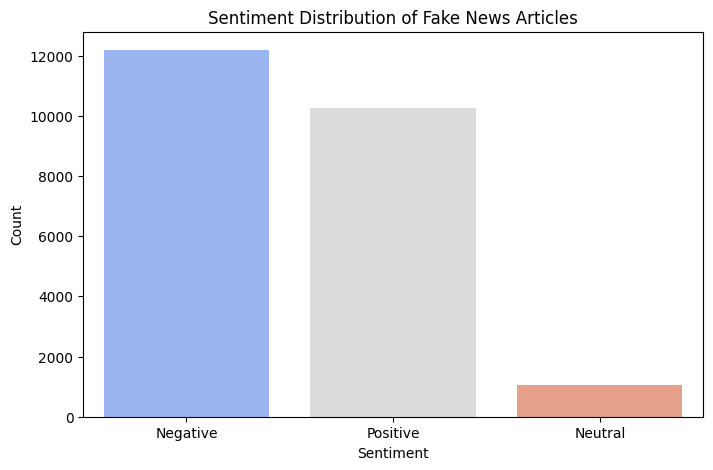

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment_label', palette='coolwarm')
plt.title("Sentiment Distribution of Fake News Articles")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


Sentiment Trend Over Time

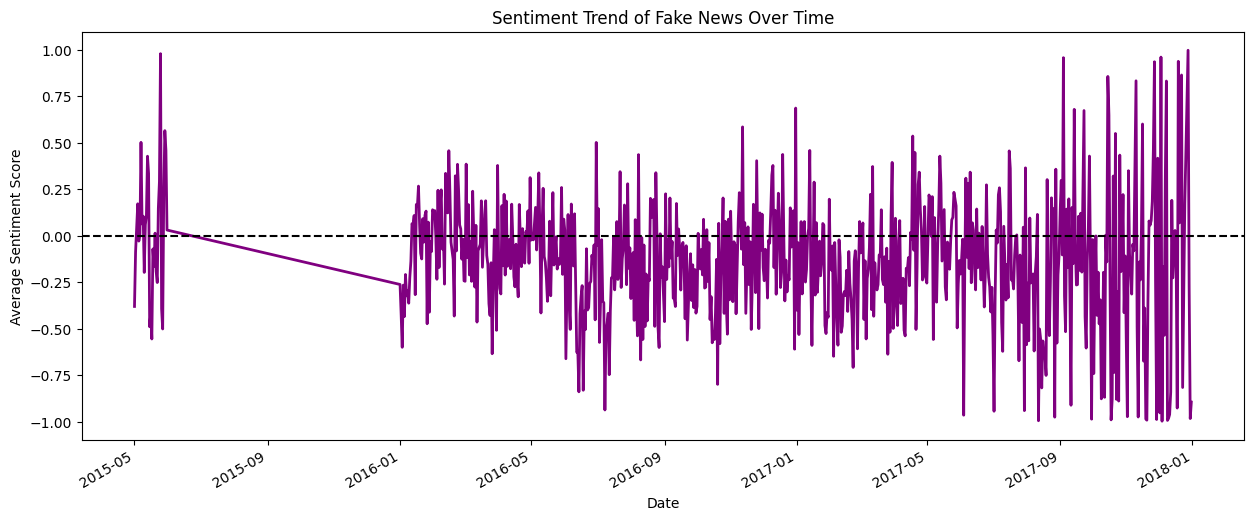

In [9]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Aggregate average sentiment over time
sentiment_over_time = df.groupby(df['date'])['sentiment'].mean()

# Plot
plt.figure(figsize=(15, 6))
sentiment_over_time.plot(color="purple", linewidth=2)
plt.title("Sentiment Trend of Fake News Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.axhline(0, color='black', linestyle='--')  # Neutral line
plt.show()
